**Blessy Chinthapalli**

Assignment 4

In [1]:
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#defining file path
file_path1 = 'longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv'
file_path2 = 'longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv'

#reading the csv file
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# 25% sample of the entire dataset - for easy computation
df1 = df1.sample(frac=0.25)
df2 = df2.sample(frac=0.25)

# Display the first few rows of the DataFrame
print(df1.head())
#print(df2.head())

<ipython-input-1-85a8649835c3>:14: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file_path2)


                              journey_id                        episode_id  \
14873   00d6838eb3395b4558f840a63edd0ea5  673bc783288095ee8888b4b57f077038   
128972  06a968dbfd1298ed4265bdca2e973a5a  2f3e6cde4b053d854465cc320f07912b   
285019  0eab7363dd682376e7c0c051f72ad92f  0ecb35f4098a07e000e291bf08118c99   
37097   01e3ee180c117db19082733775f7bc23  612114e2b51aaa9350e27803185fd53c   
87722   0494079c5193afb3aafe011f3c8f7d32  a79d12924d19e2888aeec6ca858542f5   

                                                 visit_id  \
14873   12b9eb15909bff35d8e8925646e848b44aba571f8bdfdc...   
128972  531fb25307916b245f94e2c15a09ba4eaf14d3f8559e12...   
285019  963d81b8d9bf697b7af014a46532228e0c687932834d7a...   
37097   353a705528f7bb3d41bfb4baa108e9dee926d59a64b963...   
87722   22126948130d971f82a586e850d83d6032d23be76b46ca...   

                                             encounter_id  claim_date  \
14873   1a66af4e8d99b659dc6be67653356bd5e06772458f2ce5...  2023-08-23   
128972  1fe9bcbdf0

In [2]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155881 entries, 14873 to 605869
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         155881 non-null  object 
 1   episode_id         155881 non-null  object 
 2   visit_id           155429 non-null  object 
 3   encounter_id       155881 non-null  object 
 4   claim_date         155881 non-null  object 
 5   patient_state      155881 non-null  object 
 6   patient_short_zip  155878 non-null  float64
 7   patient_age        154261 non-null  float64
 8   patient_gender     155881 non-null  object 
 9   place_of_service   121134 non-null  object 
 10  visit_type         150140 non-null  object 
 11  payor              152207 non-null  object 
 12  payor_channel      146477 non-null  object 
 13  ref_npi            74217 non-null   float64
 14  hcp_npi            108770 non-null  float64
 15  hcp_taxonomy       107158 non-null  object 
 16

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223656 entries, 381357 to 426428
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     223656 non-null  object 
 1   cohort_id                      223656 non-null  int64  
 2   claim_id                       223656 non-null  object 
 3   patient_gender                 223656 non-null  object 
 4   patient_state                  223656 non-null  object 
 5   patient_zip                    223656 non-null  object 
 6   patient_dob                    223656 non-null  object 
 7   pharmacy_npi                   223656 non-null  object 
 8   pharmacist_npi                 223656 non-null  object 
 9   prescriber_npi                 223656 non-null  object 
 10  primary_care_npi               223656 non-null  object 
 11  group_id                       223656 non-null  object 
 12  date_of_service          

# Part 1: Exploratory Data Analysis

In [5]:
# listing all the numeric columns in the data set

numeric_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['patient_short_zip',
 'patient_age',
 'ref_npi',
 'hcp_npi',
 'hco_npi',
 'rev_center_code',
 'rev_center_units',
 'proc_units',
 'line_charge',
 'claim_charge',
 'smart_allowed']

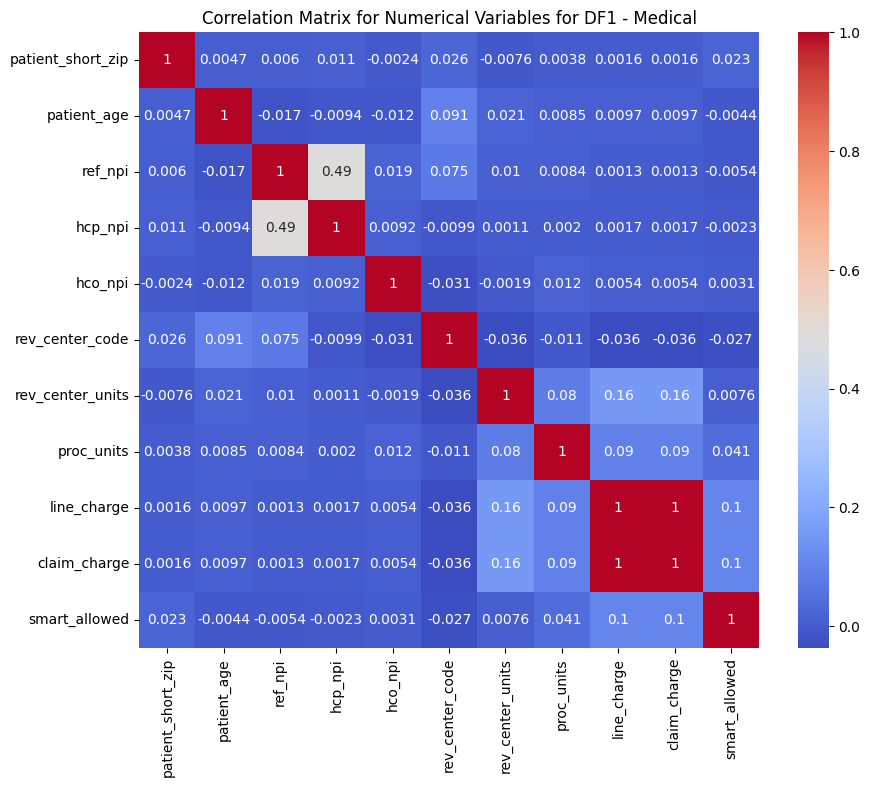

In [6]:
## Heatmap of DF1
plt.figure(figsize=(10, 8))

correlation_matrix = df1[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables for DF1 - Medical')
plt.show()

1. There is not specific target variable yet to check the correlation between these variables and Y label
2. Most of the numerical columns are not corrrelated as they are below 0.1 and -0.1 in many cases which is considered not significant.
3.  A correlation of 0.49 between `hcp_npi` - the provider performing the service and `ref_npi` - the referring provider. This indicates that in some cases, the provider performing the service is moderately linked to the identity of the referring provider, may be due to referrals or networks among them.

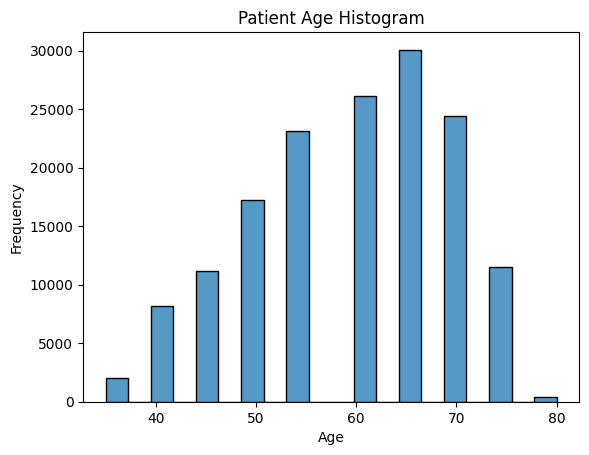

In [7]:
# EDA 2: Patient Age Frequency
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df1['patient_age'], bins=20)
plt.title('Patient Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Insights:
1. The most frequent age group is between 60 and 65

 From the age distribution, analysis on the effects of Ozempic has higher representation of patients in their 60s. Age-related factors may need to be controlled for treatment effect.

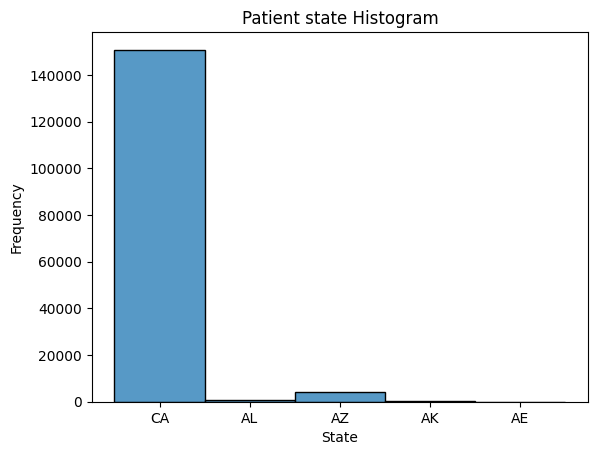

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df1['patient_state'], bins=10)
plt.title('Patient state Histogram')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

Insights:

1. The dataset is heavily skewed toward 'CA', which has a much higher patient count than the others.

Additional analysis could be done to compare the demographic and health characteristics of the patients in CA and  across states.

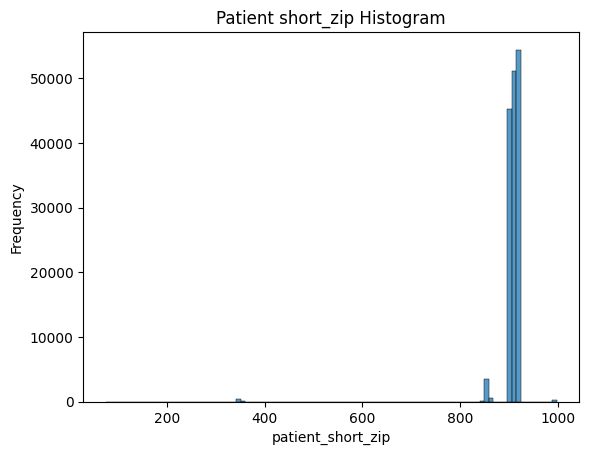

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df1['patient_short_zip'], bins=100)
plt.title('Patient short_zip Histogram')
plt.xlabel('patient_short_zip')
plt.ylabel('Frequency')
plt.show()

In [10]:
import operator

# 1. Select 'diag_' columns
#diag_columns = [col for col in df.columns if col.startswith('diag_')]
df_zip = df1['patient_short_zip']

# 2. Combine values
combined_list = df_zip.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# 3. Process first three digits (same as before)
zips = {}
for diag_code in combined_list:
    #first_three = diag_code[:3]
    zips[diag_code] = zips.get(diag_code, 0) + 1

sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

(900.0, 45239)
(922.0, 41697)
(908.0, 13833)
(921.0, 12736)
(910.0, 12068)
(913.0, 8658)
(912.0, 8490)
(911.0, 8049)
(853.0, 1632)
(857.0, 768)
(852.0, 586)
(864.0, 367)
(856.0, 346)
(350.0, 283)
(351.0, 168)
(863.0, 136)
(352.0, 136)
(859.0, 125)
(995.0, 110)
(855.0, 102)
(996.0, 80)
(997.0, 69)
(860.0, 54)
(272.0, 10)
(850.0, 10)
(344.0, 10)
(91.0, 9)
(923.0, 9)
(194.0, 8)
(320.0, 7)
(606.0, 7)
(998.0, 6)
(328.0, 5)
(787.0, 5)
(891.0, 5)
(304.0, 4)
(333.0, 4)
(841.0, 3)
(619.0, 3)
(629.0, 3)
(773.0, 3)
(770.0, 2)
(330.0, 2)
(170.0, 2)
(895.0, 2)
(105.0, 2)
(370.0, 2)
(337.0, 2)
(524.0, 2)
(503.0, 2)
(527.0, 2)
(722.0, 2)
(924.0, 2)
(315.0, 1)
(631.0, 1)
(720.0, 1)
(483.0, 1)
(752.0, 1)
(917.0, 1)
(74.0, 1)
(616.0, 1)
(890.0, 1)
(200.0, 1)
(776.0, 1)


Most Patients are from California.
Especially,
1. (900.0, 180469) -- Los Angeles, LA
2. (922.0, 166422) -- Riverside
3. (908.0, 55562)  -- Long Beach
4. (921.0, 51190)  -- San Diego
5. (910.0, 48395)  -- Pasific Grove
6. (913.0, 34571)  -- LA
7. (912.0, 34143)  -- Glendale, LA
8. (911.0, 32244)  -- Pasadena

Areas like LA and Riverside have urban population so these cities may be more available to new medicines and better health care providers, or simply that there is a larger population in these areas.

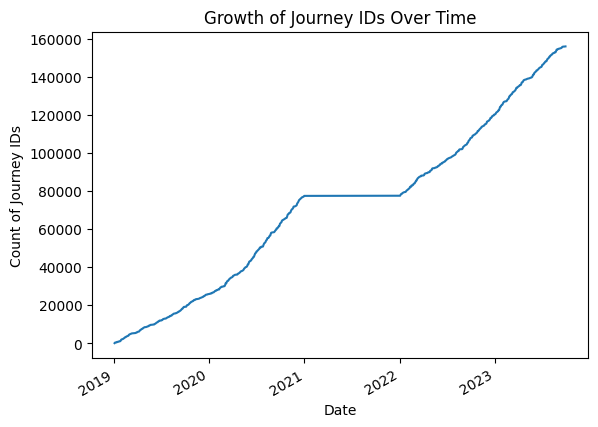

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# changing datetime format
df1['claim_date'] = pd.to_datetime(df1['claim_date'])
df1_sorted = df1.sort_values(by='claim_date')

# no of jouney id for each date
journey_ids_count = df1_sorted.groupby('claim_date').size()

# sum of new id's
journeys_sum = journey_ids_count.cumsum()

# Plot
journeys_sum.plot()
plt.title('Growth of Journey IDs Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Journey IDs')
plt.show()


There is a clear increase in the count of journey IDs over time, which suggests that more patients are treated with or without ozempic.

Additional insights for which procedures or drugs are common in the patients

In [12]:
#df1.diag_list

df1['diag_list'].value_counts().head(20)

Z0000      2427
I10        1670
G4733      1588
E119       1245
R6889       913
Z1231       846
Z20828      549
Z7689       508
Z0189       480
E1165       467
R079        425
N390        421
Z20822      420
Z01818      418
Z23         372
Z1211       353
Z0001       335
I10,I10     332
M545        305
Z01812      263
Name: diag_list, dtype: int64

In [13]:
# 1. Select 'diag_' columns
diag_columns = [col for col in df1.columns if col.startswith('diag_')]
df_diag = df1[diag_columns]

# 2. Combine values
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# 3. Process first three digits (same as before)
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

import operator
# Sort in descending order
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

('E11', 58111)
('I10', 49413)
('E78', 28490)
('Z00', 23940)
('E66', 17286)
('Z68', 13510)
('M25', 12811)
('M54', 12723)
('Z12', 7990)
('N18', 7886)
('Z01', 7810)
('Z13', 7508)
('M79', 7303)
('R10', 7031)
('G47', 7011)
('Z79', 6737)
('E55', 6695)
('Z71', 6638)
('R07', 6528)
('E03', 6207)
('R73', 6189)
('N39', 5524)
('M17', 5494)
('D64', 4971)
('Z20', 4288)
('I25', 4248)
('R53', 4077)
('R06', 3949)
('I50', 3903)
('J44', 3665)
('F41', 3515)
('Z23', 3446)
('I48', 3203)
('K21', 3120)
('Z11', 2998)
('G89', 2951)
('I11', 2838)
('F33', 2815)
('N40', 2715)
('J45', 2705)
('E87', 2542)
('M19', 2495)
('U07', 2489)
('M47', 2472)
('R05', 2412)
('A41', 2338)
('R68', 2305)
('D50', 2294)
('F32', 2242)
('J96', 2187)
('M51', 2162)
('I12', 2083)
('L03', 2042)
('Z51', 1949)
('B35', 1942)
('R79', 1911)
('R51', 1860)
('N17', 1795)
('K76', 1784)
('Z76', 1777)
('L97', 1763)
('R42', 1759)
('H25', 1755)
('F17', 1702)
('R00', 1666)
('M48', 1659)
('M62', 1643)
('C50', 1640)
('R94', 1613)
('Z86', 1568)
('I70', 1527

# Top 5 OCC - Diagnosis

E11 -- Type 2 diabetes mellitus

I10 -- Essential (primary) hypertension

E78 -- Disorders of lipoprotein metabolism and other lipidemias

Z00 -- Encounter for general examination without complaint, suspected or reported diagnosis

E66 -- Overweight and obesity

In [14]:
df1['proc_code'].unique()

array(['82247', 'J3010', 'J2930', ..., '99391', '00942', '26123'],
      dtype=object)

In [15]:
# OZP
filtered_df = df1[df1['proc_code'] == "J3490"]

# 1. Select 'diag_' columns
diag_columns = [col for col in filtered_df.columns if col.startswith('diag_')]
df_diag = filtered_df[diag_columns]

# 2. Combine values
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# 3. Process first three digits (same as before)
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

('I10', 61)
('E11', 49)
('E78', 28)
('J45', 22)
('N18', 20)
('E66', 18)
('I25', 18)
('Z79', 16)
('I48', 16)
('Z51', 16)
('R07', 15)
('Z30', 14)
('H25', 13)
('F41', 12)
('M54', 10)
('M17', 10)
('K80', 9)
('D68', 9)
('K21', 9)
('Z99', 9)
('Z68', 9)
('C18', 9)
('G89', 9)
('J20', 8)
('Z86', 8)
('K29', 7)
('N25', 7)
('R42', 7)
('J44', 7)
('G47', 7)
('C50', 7)
('Z87', 6)
('F32', 6)
('N95', 6)
('E86', 6)
('F33', 6)
('Z88', 6)
('N39', 6)
('F17', 6)
('M75', 6)
('M53', 6)
('E03', 6)
('Z20', 5)
('M79', 5)
('I11', 5)
('D50', 5)
('F31', 5)
('R10', 5)
('N20', 5)
('K59', 5)
('M20', 5)
('J30', 4)
('F43', 4)
('D64', 4)
('Z85', 4)
('N81', 4)
('C61', 4)
('R94', 4)
('M65', 4)
('K85', 4)
('R51', 4)
('N12', 4)
('T85', 4)
('M25', 4)
('M47', 4)
('S01', 4)
('R19', 4)
('R05', 3)
('R53', 3)
('K22', 3)
('K44', 3)
('M19', 3)
('Z90', 3)
('T83', 3)
('N83', 3)
('S83', 3)
('K42', 3)
('D17', 3)
('I49', 3)
('R52', 3)
('D12', 3)
('Z95', 3)
('K62', 3)
('S09', 3)
('Z91', 3)
('C22', 3)
('K43', 3)
('N13', 3)
('M51', 3)
('N49

# TOP 5 OCC for OZP Users
I10  Essential (primary) hypertension

E11  Type 2 diabetes mellitus

E78  Disorders of lipoprotein metabolism and other lipidemias

N18  Chronic kidney disease (CKD)

I25  Chronic ischemic heart disease


**Insights**

Both the general population (df) and Ozempic (filtered_df) patients have common top 2 occ, including Type 2 diabetes mellitus (E11), Essential (primary) hypertension (I10),

In [16]:
df1_obesity = df1[df1['diag_1'].str.startswith("E66")|
      df1['diag_2'].str.startswith("E66")|
      df1['diag_3'].str.startswith("E66")|
      df1['diag_4'].str.startswith("E66")|
      df1['diag_5'].str.startswith("E66")]


df1_obesity['diag'] = "Obesity"
df1_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15657 entries, 37097 to 300434
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   journey_id         15657 non-null  object        
 1   episode_id         15657 non-null  object        
 2   visit_id           15629 non-null  object        
 3   encounter_id       15657 non-null  object        
 4   claim_date         15657 non-null  datetime64[ns]
 5   patient_state      15657 non-null  object        
 6   patient_short_zip  15655 non-null  float64       
 7   patient_age        15446 non-null  float64       
 8   patient_gender     15657 non-null  object        
 9   place_of_service   12481 non-null  object        
 10  visit_type         14886 non-null  object        
 11  payor              14983 non-null  object        
 12  payor_channel      14461 non-null  object        
 13  ref_npi            5993 non-null   float64       
 14  h

<ipython-input-16-6ec1402be3f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_obesity['diag'] = "Obesity"


In [17]:
patients_gender_cnt = df1_obesity.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

,diag,patient_gender,count,gender_ratio
0,Obesity,F,3868,0.595994
1,Obesity,M,2620,0.403698
2,Obesity,None,2,0.000308


When analyzing ozp effects on obese or hypertensive patients, we should consider gender differences also.

# Part 2: Data Preprocessing and Merging

In [18]:
print(df1.isnull().sum())

journey_id                0
episode_id                0
visit_id                452
encounter_id              0
claim_date                0
patient_state             0
patient_short_zip         3
patient_age            1620
patient_gender            0
place_of_service      34747
visit_type             5741
payor                  3674
payor_channel          9404
ref_npi               81664
hcp_npi               47111
hcp_taxonomy          48723
hcp_specialty         48718
hco_npi                1382
hcp_npi_list          47111
hco_npi_list           1382
diag_list               236
diag_1                  236
diag_2                40727
diag_3                64665
diag_4                81594
diag_5               104605
rev_center_code      127318
rev_center_units        472
proc_code              5926
proc_modifier        114360
proc_units              515
line_charge               0
claim_charge              0
smart_allowed             0
dtype: int64


In [19]:
print(df2.isnull().sum())

journey_id                            0
cohort_id                             0
claim_id                              0
patient_gender                        0
patient_state                         0
patient_zip                           0
patient_dob                           0
pharmacy_npi                          0
pharmacist_npi                        0
prescriber_npi                        0
primary_care_npi                      0
group_id                              0
date_of_service                       0
date_authorized                       0
transaction_type                      0
date_prescription_written             0
ndc11                                 0
ndc11_original                        0
number_of_refills_authorized      11353
diagnosis_code                    20053
diagnosis_code_type                   0
quantity_prescribed_original     142952
quantity_dispensed                    2
place_of_service                      0
is_service                            0


In [20]:
# Join both df
df = pd.merge(df1, df2, on='journey_id', how='inner')


In [21]:
print(df.head(1))

                         journey_id                        episode_id  \
0  06a968dbfd1298ed4265bdca2e973a5a  2f3e6cde4b053d854465cc320f07912b   

                                            visit_id  \
0  531fb25307916b245f94e2c15a09ba4eaf14d3f8559e12...   

                                        encounter_id claim_date  \
0  1fe9bcbdf0e40338d0815fd8702dfec9b36e08183d114d... 2020-06-24   

  patient_state_x  patient_short_zip  patient_age patient_gender_x  \
0              CA              921.0         50.0                M   

  place_of_service_x  ...     bin plan_pay reject_code_1  reject_code_3  \
0                NaN  ...  022659      NaN          None           None   

   reject_code_4 reject_code_5        ndc  active start_date end_date  
0           None          None  406048410    True     190001     None  

[1 rows x 81 columns]


Handling Missing Values

In [22]:
# listintg the percentage of missing value for all columns

cols_to_drop=[]
def display_missing_perc(df):
    for col in df.columns.tolist():
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} -- missing values: {missing_value} %')
        if missing_value >= 60:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(df)

journey_id -- missing values: 0.0 %
episode_id -- missing values: 0.0 %
visit_id -- missing values: 0.21989699816152572 %
encounter_id -- missing values: 0.0 %
claim_date -- missing values: 0.0 %
patient_state_x -- missing values: 0.0 %
patient_short_zip -- missing values: 0.0038682100824895802 %
patient_age -- missing values: 0.8642226025962136 %
patient_gender_x -- missing values: 0.0 %
place_of_service_x -- missing values: 21.175280418368413 %
visit_type -- missing values: 4.1242640998943765 %
payor -- missing values: 0.8111958893820856 %
payor_channel -- missing values: 6.0083510357669745 %
ref_npi -- missing values: 49.14641497513063 %
hcp_npi -- missing values: 31.670271623562986 %
hcp_taxonomy -- missing values: 32.71748205311697 %
hcp_specialty -- missing values: 32.71076641061265 %
hco_npi -- missing values: 0.9558776914952029 %
hcp_npi_list -- missing values: 31.670271623562986 %
hco_npi_list -- missing values: 0.9558776914952029 %
diag_list -- missing values: 0.1849756571390

In [23]:
# with missign values more than 60%
len(cols_to_drop)

6

In [24]:
cols_to_drop

['diag_5',
 'rev_center_code',
 'proc_modifier',
 'quantity_prescribed_original',
 'daw_code',
 'coupon_value_amount']

diag_5 is needed as we might consider this column to check the improvement in the patient health.

 daw code - it has 76% missing values.

'rev_center_code', 'proc_modifier', - can drop these 2 columns as they dont add much value to our analysis.

'coupon_value_amount' - has 100% missing values

In [25]:
## handleing the duplicated columns

for column in set(df.columns):
    if column.endswith('_x'):
        col_y = column[:-2] + '_y'
        if col_y in df.columns:
            df[column] = df[column].combine_first(df[col_y])
            df.drop(col_y, axis=1, inplace=True)

df.columns = [col[:-2] if col.endswith('_x') else col for col in df.columns]


In [26]:
df.columns

Index(['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
       'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
       'place_of_service', 'visit_type', 'payor', 'payor_channel', 'ref_npi',
       'hcp_npi', 'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 'hcp_npi_list',
       'hco_npi_list', 'diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4',
       'diag_5', 'rev_center_code', 'rev_center_units', 'proc_code',
       'proc_modifier', 'proc_units', 'line_charge', 'claim_charge',
       'smart_allowed', 'cohort_id', 'claim_id', 'patient_zip', 'patient_dob',
       'pharmacy_npi', 'pharmacist_npi', 'prescriber_npi', 'primary_care_npi',
       'group_id', 'date_of_service', 'date_authorized', 'transaction_type',
       'date_prescription_written', 'ndc11', 'ndc11_original',
       'number_of_refills_authorized', 'diagnosis_code', 'diagnosis_code_type',
       'quantity_prescribed_original', 'quantity_dispensed', 'is_service',
       'level_of_servi

Considering 50 out of 81 columns of the merged dataset

In [27]:
#columns_of_interest = ['journey_id', 'claim_date', 'patient_state', 'patient_age', 'patient_gender', 'diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5', \
#                        'proc_code', 'proc_modifier', 'proc_units', 'smart_allowed', 'number_of_refills_authorized', 'quantity_prescribed_original', 'quantity_dispensed', \
#                            'place_of_service', 'is_service', 'level_of_service', 'fill_number', 'days_supply', 'pharmacy_submitted_cost']

columns_of_interest = ['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
       'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
       'diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4',
       'diag_5', 'proc_code','proc_modifier', 'proc_units', 'line_charge', 'claim_charge',
       'smart_allowed', 'cohort_id', 'claim_id', 'patient_zip', 'patient_dob',
       'group_id', 'date_of_service', 'date_authorized', 'transaction_type',
       'date_prescription_written', 'ndc11', 'ndc11_original', 'pharmacy_submitted_cost',
       'number_of_refills_authorized', 'diagnosis_code', 'diagnosis_code_type',
       'quantity_prescribed_original', 'quantity_dispensed', 'is_service',
       'level_of_service', 'fill_number', 'days_supply', 'unit_of_measure', 'is_compound_drug',
       'reject_code_1', 'reject_code_3', 'reject_code_4', 'reject_code_5',
       'ndc', 'active']
       # , 'start_date', 'end_date'
df = df[columns_of_interest].drop_duplicates()

len(df.columns)

50

In [28]:

display_missing_perc(df)

journey_id -- missing values: 0.0 %
episode_id -- missing values: 0.0 %
visit_id -- missing values: 0.2225271934744494 %
encounter_id -- missing values: 0.0 %
claim_date -- missing values: 0.0 %
patient_state -- missing values: 0.0 %
patient_short_zip -- missing values: 0.003974685668608374 %
patient_age -- missing values: 0.8490922259564638 %
patient_gender -- missing values: 0.0 %
diag_list -- missing values: 0.1848228835902894 %
diag_1 -- missing values: 0.1848228835902894 %
diag_2 -- missing values: 25.61304006041522 %
diag_3 -- missing values: 40.70481113618598 %
diag_4 -- missing values: 51.66462043960024 %
diag_5 -- missing values: 66.83229697084789 %
proc_code -- missing values: 3.6381622819995316 %
proc_modifier -- missing values: 71.17668361060446 %
proc_units -- missing values: 0.27226596829967364 %
line_charge -- missing values: 0.0 %
claim_charge -- missing values: 0.0 %
smart_allowed -- missing values: 0.0 %
cohort_id -- missing values: 0.0 %
claim_id -- missing values: 0

Handled the missing values below after creating df for obesity and hypentensive

# Part 3: Causal Analysis Setup


**Potential Endogeneity Issues:**

1. Patient state-zip variables could affect both the chances of receiving Ozempic and health outcomes - such as state healthcare policies, access to medical care, regional heath trends.

2. Patients with more severe hypertension/ obesity may be more likely to receive Ozempic, and their condition may also be more likely to improve

3. Unobserved factors like patients not willing to take medication, not tracking their status(missing values) or lifestyle that affect both the probability of being treated with Ozempic

**Our Approach**

We Used Simple Random Block Assignment to ensure that the treatment is independent of the potential outcomes and confounders. To sperate the affect of one over another block, we created blocks based on similar characteristics  to treat one with ozempic/ no ozempic to study the effect of the drug.


To investigate the effect of Ozempic (procedure code "J3490") on patients we created two df for obesity (diag =  "E66") and hypertensive (diag =  "I10").

In [29]:
# New column ozp
df['ozp'] = 0

lst_ozp = df[df['proc_code'] == "J3490"]['journey_id'].unique()
df.loc[df['journey_id'].isin(lst_ozp), 'ozp'] = 1

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811464 entries, 0 to 1861325
Data columns (total 51 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   journey_id                    object        
 1   episode_id                    object        
 2   visit_id                      object        
 3   encounter_id                  object        
 4   claim_date                    datetime64[ns]
 5   patient_state                 object        
 6   patient_short_zip             float64       
 7   patient_age                   float64       
 8   patient_gender                object        
 9   diag_list                     object        
 10  diag_1                        object        
 11  diag_2                        object        
 12  diag_3                        object        
 13  diag_4                        object        
 14  diag_5                        object        
 15  proc_code                     ob

In [30]:
counts = df['ozp'].value_counts()
print(counts)

0    1739486
1      71978
Name: ozp, dtype: int64


**Causal Analysis Set Up**
1. **Treatment**: The 'ozp' binary indicator is to identify whether patients have been treated with Ozempic or not

2. **Outcome**: The 'cured' variable represents a change in health status, by comparing the first and last records within the patient journey - we measured the change in obesity and hypertensive status over time.

3. The 'treating_days' variable accounts for the duration of treatment, which is crucial because the impact of treatment may vary with treatment length



In [34]:
lst_obesity = df[df['diag_1'].str.startswith("E66")|
      df['diag_2'].str.startswith("E66")|
      df['diag_3'].str.startswith("E66")|
      df['diag_4'].str.startswith("E66")|
      df['diag_5'].str.startswith("E66")]['journey_id']

In [35]:
df_obesity = df[df['journey_id'].isin(lst_obesity)]
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834751 entries, 53 to 1861295
Data columns (total 51 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   journey_id                    834751 non-null  object        
 1   episode_id                    834751 non-null  object        
 2   visit_id                      832709 non-null  object        
 3   encounter_id                  834751 non-null  object        
 4   claim_date                    834751 non-null  datetime64[ns]
 5   patient_state                 834751 non-null  object        
 6   patient_short_zip             834679 non-null  float64       
 7   patient_age                   825697 non-null  float64       
 8   patient_gender                834751 non-null  object        
 9   diag_list                     833057 non-null  object        
 10  diag_1                        833057 non-null  object        
 11  diag_2     

By tracking the change in the hypertensive indicator and considering the treatment duration, we tried the attempt to infer the effect of Ozempic on obesity.

The start_obesity and end_obesity diff will give us the **'cured**' column

In [36]:
df_obesity['obesity'] = 0

df_obesity.loc[df_obesity['diag_1'].str.startswith("E66") |
               df_obesity['diag_2'].str.startswith("E66") |
               df_obesity['diag_3'].str.startswith("E66") |
               df_obesity['diag_4'].str.startswith("E66") |
               df_obesity['diag_5'].str.startswith("E66"), 'obesity'] = 1

<ipython-input-36-0cdfb2975495>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['obesity'] = 0


To get the progress of the patient, getting the first and last record of the patient

In [38]:
filtered_obesity_df = df_obesity.groupby('journey_id').filter(lambda x: x['claim_date'].nunique() > 1)

df_obesity_sorted = filtered_obesity_df.sort_values(by=['journey_id', 'claim_date'])


# Filter the DataFrame to include only rows where 'proc_code' == "J3490" and 'opz' == 1
filtered_df_ozp = df_obesity_sorted[(df_obesity_sorted['proc_code'] == "J3490") & (df_obesity_sorted['ozp'] == 1)]
filtered_df_no_ozp = df_obesity_sorted[df_obesity_sorted['ozp'] == 0]

filtered_df = pd.concat([filtered_df_ozp, filtered_df_no_ozp]).reset_index(drop=True)

# Group by 'journey_id' and get the first record for each group
first_obesity_records = filtered_df.groupby('journey_id').head(1).copy()
first_obesity_records = first_obesity_records[first_obesity_records['obesity']==1]


## The last record of the patient
last_obesity_records = df_obesity_sorted.groupby('journey_id').tail(1).copy()

In [39]:
result_obesity_records = last_obesity_records[['journey_id', 'claim_date', 'smart_allowed', 'obesity']]
result_obesity_records = result_obesity_records.rename(columns={'claim_date': 'end_date', 'smart_allowed': 'end_smart_allowed', 'obesity': 'end_obesity'})

Calculating the diff between the first record's claim date and the last record's claim date for Obesity gives the **'treating_days'**

end_date will be last record's claim_date

In [40]:
df_obesity_first_last = pd.merge(first_obesity_records, result_obesity_records, on='journey_id', how='inner')

df_obesity_full = df_obesity_first_last
df_obesity_full['treating_days'] = (df_obesity_full['end_date'] - df_obesity_full['claim_date']).dt.days
df_obesity_full['cured'] = df_obesity_full['obesity'] - df_obesity_full['end_obesity']

df_obesity_full = df_obesity_full.drop(['diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5', 'quantity_prescribed_original', 'obesity', 'end_obesity'], axis=1)

In [41]:
df_obesity_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   journey_id                    737 non-null    object        
 1   episode_id                    737 non-null    object        
 2   visit_id                      737 non-null    object        
 3   encounter_id                  737 non-null    object        
 4   claim_date                    737 non-null    datetime64[ns]
 5   patient_state                 737 non-null    object        
 6   patient_short_zip             736 non-null    float64       
 7   patient_age                   732 non-null    float64       
 8   patient_gender                737 non-null    object        
 9   proc_code                     710 non-null    object        
 10  proc_modifier                 96 non-null     object        
 11  proc_units                    73

Handling and imputing missing values for categorical and numerical values for obesity df

In [42]:
# Categorical variables
df_obesity_full['proc_code'].fillna(value='empty', inplace=True)
df_obesity_full['proc_modifier'].fillna(value='empty', inplace=True)
df_obesity_full['diagnosis_code'].fillna(value='None', inplace=True)
df_obesity_full['unit_of_measure'].fillna('None', inplace=True)

# Mode to handle missing values here.
mode_age = df_obesity_full['patient_age'].mode()[0]
df_obesity_full['patient_age'].fillna(value=mode_age, inplace=True)

mode_proc_units = df_obesity_full['proc_units'].mode()[0]
df_obesity_full['proc_units'].fillna(value=mode_proc_units, inplace=True)

mode_number_of_refills_authorized = df_obesity_full['number_of_refills_authorized'].mode()[0]
df_obesity_full['number_of_refills_authorized'].fillna(value=mode_number_of_refills_authorized, inplace=True)

mode_pharmacy_submitted_cost = df_obesity_full['pharmacy_submitted_cost'].mode()[0]
df_obesity_full['pharmacy_submitted_cost'].fillna(value=mode_pharmacy_submitted_cost, inplace=True)

mode_patient_short_zip = df_obesity_full['patient_short_zip'].mode()[0]
df_obesity_full['pharmacy_submitted_cost'].fillna(value=mode_patient_short_zip, inplace=True)

df_obesity_full['patient_zip'] = df_obesity_full['patient_zip'].astype(str)
#df_obesity_full['patient_short_zip'].fillna(df_obesity_full['patient_short_zip'].mode()[0], inplace=True)

df_obesity_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   journey_id                    737 non-null    object        
 1   episode_id                    737 non-null    object        
 2   visit_id                      737 non-null    object        
 3   encounter_id                  737 non-null    object        
 4   claim_date                    737 non-null    datetime64[ns]
 5   patient_state                 737 non-null    object        
 6   patient_short_zip             736 non-null    float64       
 7   patient_age                   737 non-null    float64       
 8   patient_gender                737 non-null    object        
 9   proc_code                     737 non-null    object        
 10  proc_modifier                 737 non-null    object        
 11  proc_units                    73

In [43]:
display_missing_perc(df_obesity_full)

journey_id -- missing values: 0.0 %
episode_id -- missing values: 0.0 %
visit_id -- missing values: 0.0 %
encounter_id -- missing values: 0.0 %
claim_date -- missing values: 0.0 %
patient_state -- missing values: 0.0 %
patient_short_zip -- missing values: 0.13568521031207598 %
patient_age -- missing values: 0.0 %
patient_gender -- missing values: 0.0 %
proc_code -- missing values: 0.0 %
proc_modifier -- missing values: 0.0 %
proc_units -- missing values: 0.0 %
line_charge -- missing values: 0.0 %
claim_charge -- missing values: 0.0 %
smart_allowed -- missing values: 0.0 %
cohort_id -- missing values: 0.0 %
claim_id -- missing values: 0.0 %
patient_zip -- missing values: 0.0 %
patient_dob -- missing values: 0.0 %
group_id -- missing values: 0.0 %
date_of_service -- missing values: 0.0 %
date_authorized -- missing values: 0.0 %
transaction_type -- missing values: 0.0 %
date_prescription_written -- missing values: 0.0 %
ndc11 -- missing values: 0.0 %
ndc11_original -- missing values: 0.0 

Treatment 2: Hypertensive

In [44]:
lst_hypertensive = df[df['diag_1'].str.startswith("I10")|
      df['diag_2'].str.startswith("I10")|
      df['diag_3'].str.startswith("I10")|
      df['diag_4'].str.startswith("I10")|
      df['diag_5'].str.startswith("I10")]['journey_id']

In [45]:
df_hypertensive = df[df['journey_id'].isin(lst_hypertensive)]
df_hypertensive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394644 entries, 27 to 1861048
Data columns (total 51 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   journey_id                    1394644 non-null  object        
 1   episode_id                    1394644 non-null  object        
 2   visit_id                      1392692 non-null  object        
 3   encounter_id                  1394644 non-null  object        
 4   claim_date                    1394644 non-null  datetime64[ns]
 5   patient_state                 1394644 non-null  object        
 6   patient_short_zip             1394644 non-null  float64       
 7   patient_age                   1384439 non-null  float64       
 8   patient_gender                1394644 non-null  object        
 9   diag_list                     1392858 non-null  object        
 10  diag_1                        1392858 non-null  object        
 1

By tracking the change in the hypertensive indicator and considering the treatment duration, you can attempt to infer the effect of Ozempic on hypertensive.

In [46]:
df_hypertensive['hypertensive'] = 0

df_hypertensive.loc[df_hypertensive['diag_1'].str.startswith("I10", na=False) |
                    df_hypertensive['diag_2'].str.startswith("I10", na=False) |
                    df_hypertensive['diag_3'].str.startswith("I10", na=False) |
                    df_hypertensive['diag_4'].str.startswith("I10", na=False) |
                    df_hypertensive['diag_5'].str.startswith("I10", na=False), 'hypertensive'] = 1

<ipython-input-46-b50e95b9708c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hypertensive['hypertensive'] = 0


In [47]:
filtered_hypertensive_df = df_hypertensive.groupby('journey_id').filter(lambda x: x['claim_date'].nunique() > 1)

df_hypertensive_sorted = filtered_hypertensive_df.sort_values(by=['journey_id', 'claim_date'])


# Filter the DataFrame to include only rows where 'proc_code' == "J3490" and 'opz' == 1
filtered_df_ozp = df_hypertensive_sorted[(df_hypertensive_sorted['proc_code'] == "J3490") & (df_hypertensive_sorted['ozp'] == 1)]
filtered_df_no_ozp = df_hypertensive_sorted[df_hypertensive_sorted['ozp'] == 0]

filtered_df = pd.concat([filtered_df_ozp, filtered_df_no_ozp]).reset_index(drop=True)

# Group by 'journey_id' and get the first record for each group
first_hypertensive_records = filtered_df.groupby('journey_id').head(1).copy()
first_hypertensive_records = first_hypertensive_records[first_hypertensive_records['hypertensive']==1]


## The last record of the patient
last_hypertensive_records = df_hypertensive_sorted.groupby('journey_id').tail(1).copy()

In [48]:
result_hypertensive_records = last_hypertensive_records[['journey_id', 'claim_date', 'smart_allowed', 'hypertensive']]
result_hypertensive_records = result_hypertensive_records.rename(columns={'claim_date': 'end_date', 'smart_allowed': 'end_smart_allowed', 'hypertensive': 'end_hypertensive'})

Calculating the diff between the first record's claim date and the last record's claim date for hypertensive.

end_date will be last record's claim_date

In [49]:
df_hypertensive_first_last = pd.merge(first_hypertensive_records, result_hypertensive_records, on='journey_id', how='inner')

df_hypertensive_full = df_hypertensive_first_last
df_hypertensive_full['treating_days'] = (df_hypertensive_full['end_date'] - df_hypertensive_full['claim_date']).dt.days
df_hypertensive_full['cured'] = df_hypertensive_full['hypertensive'] - df_hypertensive_full['end_hypertensive']

df_hypertensive_full = df_hypertensive_full.drop(['diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5', 'quantity_prescribed_original', 'hypertensive', 'end_hypertensive'], axis=1)

In [50]:
df_hypertensive_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 2031
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   journey_id                    2032 non-null   object        
 1   episode_id                    2032 non-null   object        
 2   visit_id                      2030 non-null   object        
 3   encounter_id                  2032 non-null   object        
 4   claim_date                    2032 non-null   datetime64[ns]
 5   patient_state                 2032 non-null   object        
 6   patient_short_zip             2032 non-null   float64       
 7   patient_age                   2024 non-null   float64       
 8   patient_gender                2032 non-null   object        
 9   proc_code                     1997 non-null   object        
 10  proc_modifier                 322 non-null    object        
 11  proc_units                    

In [51]:
# Categorical variables
df_hypertensive_full['proc_code'].fillna(value='empty', inplace=True)
df_hypertensive_full['proc_modifier'].fillna(value='empty', inplace=True)
df_hypertensive_full['diagnosis_code'].fillna(value='None', inplace=True)
df_hypertensive_full['unit_of_measure'].fillna(value='None', inplace=True)


# Mode - to handle missing values here.
mode_age = df_hypertensive_full['patient_age'].mode()[0]
df_hypertensive_full['patient_age'].fillna(value=mode_age, inplace=True)

mode_proc_units = df_hypertensive_full['proc_units'].mode()[0]
df_hypertensive_full['proc_units'].fillna(value=mode_proc_units, inplace=True)

mode_number_of_refills_authorized = df_hypertensive_full['number_of_refills_authorized'].mode()[0]
df_hypertensive_full['number_of_refills_authorized'].fillna(value=mode_number_of_refills_authorized, inplace=True)

mode_pharmacy_submitted_cost = df_hypertensive_full['pharmacy_submitted_cost'].mode()[0]
df_hypertensive_full['pharmacy_submitted_cost'].fillna(value=mode_pharmacy_submitted_cost, inplace=True)

#df_hypertensive_full['visit_id'].fillna(df_hypertensive_full['visit_id'].mode()[0], inplace=True)

df_hypertensive_full['visit_id'] = df_hypertensive_full['visit_id'].fillna(0)

df_hypertensive_full['patient_zip'] = df_hypertensive_full['patient_zip'].astype(str)
df_hypertensive_full['visit_id'] = df_hypertensive_full['visit_id'].astype(str)

df_hypertensive_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 2031
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   journey_id                    2032 non-null   object        
 1   episode_id                    2032 non-null   object        
 2   visit_id                      2032 non-null   object        
 3   encounter_id                  2032 non-null   object        
 4   claim_date                    2032 non-null   datetime64[ns]
 5   patient_state                 2032 non-null   object        
 6   patient_short_zip             2032 non-null   float64       
 7   patient_age                   2032 non-null   float64       
 8   patient_gender                2032 non-null   object        
 9   proc_code                     2032 non-null   object        
 10  proc_modifier                 2032 non-null   object        
 11  proc_units                    

In [52]:
display_missing_perc(df_hypertensive_full)

journey_id -- missing values: 0.0 %
episode_id -- missing values: 0.0 %
visit_id -- missing values: 0.0 %
encounter_id -- missing values: 0.0 %
claim_date -- missing values: 0.0 %
patient_state -- missing values: 0.0 %
patient_short_zip -- missing values: 0.0 %
patient_age -- missing values: 0.0 %
patient_gender -- missing values: 0.0 %
proc_code -- missing values: 0.0 %
proc_modifier -- missing values: 0.0 %
proc_units -- missing values: 0.0 %
line_charge -- missing values: 0.0 %
claim_charge -- missing values: 0.0 %
smart_allowed -- missing values: 0.0 %
cohort_id -- missing values: 0.0 %
claim_id -- missing values: 0.0 %
patient_zip -- missing values: 0.0 %
patient_dob -- missing values: 0.0 %
group_id -- missing values: 0.0 %
date_of_service -- missing values: 0.0 %
date_authorized -- missing values: 0.0 %
transaction_type -- missing values: 0.0 %
date_prescription_written -- missing values: 0.0 %
ndc11 -- missing values: 0.0 %
ndc11_original -- missing values: 0.0 %
pharmacy_submi

In the above final set of features we have

Control Variables - Diag, treatment_days, units, doses etc these have rich effect on our outcome

Instrumental Variables - patient related data, age, state, financial status etc have a likelihood of our treament change because of unobserved factors



# Part 4: Model Development: Double-Lasso

We want to study the effect of the ozempic drug on obesity and hypertension. So, we filtered the main merged_df on the basis of proc and diag.

1. We Split the data in tran-test with 80-20 ratio.

2. We used cured as our outcome variable to test the effect of ozempic on both the treatments

1. We did lasso for both the df seperately. We penalised few features and did variable selection based on a set threshold

2. We did the second lasso with unpenalised significant features selected from the first lasso.


**Double Lasso regressions is performed,first for selecting controls and the second for estimating treatment effects.**

In [53]:
# from jake's partial lasso code
import numpy as np

class SelectiveRegularizationLinearRegression:
    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=1000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None

    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break
        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)

In [54]:
df_obesity_full.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,proc_code,...,reject_code_3,reject_code_4,reject_code_5,ndc,active,ozp,end_date,end_smart_allowed,treating_days,cured
0,006d954a77c9fea4a77d46a5c4abc471,2594fa9119dbd71209b8540047a139cf,b842fe237f114ab394913db82d605557e701fb8d0d594d...,6cbab34fe5f9d234714e891442f02dcadf68e62c03191a...,2023-01-17,CA,922.0,50.0,F,J3490,...,None,None,None,172409680,True,1,2023-03-23,504.23,65,1
1,08eb37230761a1643c03016d5763eb59,31994fa6d8d646c6c7875ce0e1f1d98c,2613313903d9db3472dec68b8727ebf73a12a7fa76e0c0...,0e86528be25f0897976774eaf8a98649c164d1d189e866...,2020-03-24,CA,921.0,35.0,F,J3490,...,None,None,None,70000029901,True,1,2022-05-07,0.00,774,0
2,0a31ca741ee103c7e8c5ca73105f4622,3540828400023927c127553ee6d71499,06650ce32f55b6042764f44c89fc6b2a20df501c1ceea2...,0afeaefcdda226a8efeb121b3ac0c913bbb6bc850b352c...,2022-10-21,CA,922.0,70.0,F,J3490,...,None,None,None,42799092001,True,1,2022-10-21,343.99,0,0
3,0c070d638d2aa8a2c7139727d045e01e,0d34b1b99dd72e90accafb1f91adefbe,bb27eb55f3306d0d63acdb190a334798aaae828ed4e7eb...,60285cb84ff3d03814b54a4c4372a8d1614e6cd6f6768c...,2019-09-05,CA,910.0,50.0,F,J3490,...,None,None,None,57664037713,True,1,2023-08-23,0.00,1448,1
4,0f1bf39051b52e206ba3f8846e887ad8,dca4a136c2b8c5dc3dfc70a8eb63bb7d,72d2601cd16a02e3affa6acff47cb699f3461596348ce4...,ab5141c7db0207eee9f58ac65bb750d5e9104e64bd946d...,2020-09-16,CA,921.0,55.0,F,J3490,...,None,None,None,57237002801,True,1,2023-08-04,0.00,1052,0


In [55]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encoded data
df_obesity_encoded = pd.DataFrame()

# Label Encoding for each column
for column in df_obesity_full.columns:

        le = LabelEncoder()
        df_obesity_encoded[column] = le.fit_transform(df_obesity_full[column])



In [56]:
from sklearn.preprocessing import LabelEncoder

X = df_obesity_encoded.drop(['cured'], axis=1).values

#  ADD INTERCEPT
n_samples = len(X)
X = np.hstack((np.ones((n_samples, 1)), X))
y = df_obesity_encoded['cured'].values

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Split data into training and testing sets
X_train, X_test_o, y_train, y_test_o = train_test_split(X, y, test_size=0.2, random_state=42)



No Penalty for Patient-related data

('patient_age', 'patient_gender'), ('diagnosis_code'),('quantity_dispensed', 'is_compound_drug').


Penalty for  less directly related features: Identifiers

('journey_id', 'episode_id', 'visit_id', 'encounter_id'),  ('claim_date', 'date_of_service')

In [58]:
df_obesity_full.columns

Index(['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
       'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
       'proc_code', 'proc_modifier', 'proc_units', 'line_charge',
       'claim_charge', 'smart_allowed', 'cohort_id', 'claim_id', 'patient_zip',
       'patient_dob', 'group_id', 'date_of_service', 'date_authorized',
       'transaction_type', 'date_prescription_written', 'ndc11',
       'ndc11_original', 'pharmacy_submitted_cost',
       'number_of_refills_authorized', 'diagnosis_code', 'diagnosis_code_type',
       'quantity_dispensed', 'is_service', 'level_of_service', 'fill_number',
       'days_supply', 'unit_of_measure', 'is_compound_drug', 'reject_code_1',
       'reject_code_3', 'reject_code_4', 'reject_code_5', 'ndc', 'active',
       'ozp', 'end_date', 'end_smart_allowed', 'treating_days', 'cured'],
      dtype='object')

Fist Lasso: Adding Penalty

1. Penalties to id's, dates, cost and codes
2. Patient state and zip might be less directly related
3. No penalty on age, gender and dob
4. No penalty on diagnosis code and ndc - as it is important for ozp variable

In [59]:
apply_penalty = [
    True, True, True, True, True,
    True, True, False, False,
    True, True, True, True,   #4
    True, True, True, True, False,  #5
    True, True, True, True,
    True, True, True, #3
    False, True,
    False, True, True,
    True, True, True, False, #4
    True, True, False, True,
    True, False, True, True, False,
    False, False, False, False, False ]

alpha = 0.1 # L1 penalty term
max_iterations = 1000 # Optional, determines how long the model will look for an l1 penalty
model_o = SelectiveRegularizationLinearRegression(alpha, apply_penalty, max_iterations)
model_o.fit(X_train, y_train)


In [60]:
print("Learned coefficients:", model_o.w) # print out model coefficients

Learned coefficients: [ 8.08149406e-01  1.99174906e-05  9.26070222e-06 -3.04461163e-05
  1.96628668e-05 -4.60018755e-05  0.00000000e+00 -3.68345662e-04
  1.14436678e-03  0.00000000e+00  1.70768193e-05 -1.04514660e-04
  0.00000000e+00  8.78631078e-05  5.04729039e-20 -2.83773093e-05
  0.00000000e+00  5.70811416e-06 -9.99291472e-05 -3.12079399e-04
  1.44173259e-04 -4.71968680e-05  1.15162451e-05  0.00000000e+00
 -1.30253966e-05 -3.92232790e-06 -1.78192946e-05 -7.61108683e-05
  0.00000000e+00  2.10697372e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.56495725e-03  0.00000000e+00  1.55190285e-04
  4.24609285e-03  0.00000000e+00  0.00000000e+00 -2.18672875e-04
  0.00000000e+00  0.00000000e+00 -1.25094758e-05  3.90705049e-03
 -4.68593378e-01  6.45821088e-05  9.81267054e-05 -4.14608888e-05]


In [61]:
# identify features with influence
threshold = 0.0001
significant_features = []

features = ['intercept'] + ['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
                                 'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
                                 'proc_code', 'proc_modifier', 'proc_units', 'line_charge',
                                 'claim_charge', 'smart_allowed', 'cohort_id', 'claim_id', 'patient_zip',
                                 'patient_dob', 'group_id', 'date_of_service', 'date_authorized',
                                 'transaction_type', 'date_prescription_written', 'ndc11',
                                 'ndc11_original', 'pharmacy_submitted_cost',
                                 'number_of_refills_authorized', 'diagnosis_code', 'diagnosis_code_type',
                                 'quantity_dispensed', 'is_service', 'level_of_service', 'fill_number',
                                 'days_supply', 'unit_of_measure', 'is_compound_drug', 'reject_code_1',
                                 'reject_code_3', 'reject_code_4', 'reject_code_5', 'ndc', 'active',
                                 'ozp', 'end_date', 'end_smart_allowed', 'treating_days']

# Variables selected after Lasso
print("Features with Strong Influence on Obesity:")
for i, coef in enumerate(model_o.w):
    if abs(coef) >= threshold:
        print(f"{features[i]}: {coef}")
        significant_features.append(features[i])

Features with Strong Influence on Obesity:
intercept: 0.8081494057724957
patient_short_zip: -0.0003683456619413415
patient_age: 0.0011443667826992832
proc_modifier: -0.00010451465978078492
patient_dob: -0.0003120793986506167
group_id: 0.0001441732591706168
diagnosis_code: 0.00021069737173269053
level_of_service: -0.0025649572513761617
days_supply: 0.00015519028505595663
unit_of_measure: 0.0042460928500787755
reject_code_3: -0.00021867287534368737
active: 0.003907050486779272
ozp: -0.4685933779200697


This reduced the large set of original features down to those that have a stronger influence on the outcome

In [62]:
significant_features

['intercept',
 'patient_short_zip',
 'patient_age',
 'proc_modifier',
 'patient_dob',
 'group_id',
 'diagnosis_code',
 'level_of_service',
 'days_supply',
 'unit_of_measure',
 'reject_code_3',
 'active',
 'ozp']

I penalised patiend_short_zip but still it is one of the significant variable.

No penlaty for patient age and dob - their coefficient values are significant.

Lasso performed Variable selection and gave us the signficant features to pass to the second lasso reg for parameter tuning

In [63]:
# preparing d_hat(X)

significant_features_idx = [features.index(feature) for feature in significant_features if feature in features]

X_train_sig = X_train[:, significant_features_idx]
#y_train_sig = y_train[:, y_significant_features_idx]

X_test_sig_o = X_test_o[:, significant_features_idx]
#y_test_sig = y_test[:, y_significant_features_idx]

In [70]:
# Second Lasso: Without Penalty
double_lasso_obesity = Lasso(alpha=0.01)
double_lasso_obesity.fit(X_train_sig, y_train)

Lasso(alpha=0.01)

In [71]:
# significant features - coefficients not equal to zero
dl_significant_features = np.where(double_lasso_obesity.coef_ != 0)[0]

In [72]:

# Print column names of significant features
print("Significant features after double lasso:")
for index in dl_significant_features:
    print(significant_features[index])

Significant features after double lasso:
patient_short_zip
proc_modifier
patient_dob
group_id
diagnosis_code
level_of_service
days_supply
unit_of_measure
reject_code_3


Treatment 2: Hypertensive

In [73]:
df_hypertensive_full.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,proc_code,...,reject_code_3,reject_code_4,reject_code_5,ndc,active,ozp,end_date,end_smart_allowed,treating_days,cured
0,00261b40936d4e0cf4c4de7b04fcf250,ab71cc965b71a5ee9a8ff2057b52ee7b,8013e02fac8218d1be2403d41751b95a3bd36ce552238e...,0941ca7bbe5a99fc661cfa1007c3bdfa004bf875f4fafd...,2020-05-01,CA,922.0,65.0,M,J3490,...,None,None,None,61314022715,True,1,2020-08-03,132.50,94,1
1,006d954a77c9fea4a77d46a5c4abc471,2594fa9119dbd71209b8540047a139cf,b842fe237f114ab394913db82d605557e701fb8d0d594d...,6cbab34fe5f9d234714e891442f02dcadf68e62c03191a...,2023-01-17,CA,922.0,50.0,F,J3490,...,None,None,None,172409680,True,1,2023-03-23,504.23,65,0
2,044b16c846976f76b072a0d9c75feeb0,8b246fb054521072bd6a9d185c39bacb,5fa00e926540af3cfd33ebcebacd0153ee51964a419f6a...,574dde4dcd6527e96a8d1c19f0c71647bac5f6826ce487...,2019-10-24,CA,908.0,40.0,F,J3490,...,None,None,None,65162083366,True,1,2019-10-24,36.94,0,0
3,04ea4cf940703343b0926ea015807515,26530392e2e08175438e6b56ba9fa1dc,7fdc2d51800af781f2a07714609485b262193f5b580cd3...,9ed9c48a15e879893b5f613f4c8b3bcb13282fdef6a2ae...,2020-06-22,CA,911.0,50.0,M,J3490,...,None,None,None,2771559,True,1,2023-06-05,92.77,1078,1
4,06bdf12603d3d3ea96d1806346568ef7,2bc856a301576076cfc57e9312a36d87,3ad90a8e3b42df5320f08d4452aeabff3c28726fecbd35...,ccf3c9eef1dd05e0aa696321fe04dc37dea60d0c3ed10f...,2019-06-19,CA,910.0,70.0,F,J3490,...,None,None,None,65862020199,True,1,2020-06-05,135.47,352,1


In [74]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encoded data
df_hypertensive_encoded = pd.DataFrame()

# Label Encoding for each column
for column in df_hypertensive_full.columns:
    try:
        le = LabelEncoder()
        df_hypertensive_encoded[column] = le.fit_transform(df_hypertensive_full[column])
    except Exception as e:
        print(f"Error encoding column '{column}': {e}")
        break


In [75]:
from sklearn.preprocessing import LabelEncoder

X = df_hypertensive_encoded.drop(['cured'], axis=1).values

#  ADD INTERCEPT
n_samples = len(X)
X = np.hstack((np.ones((n_samples, 1)), X))
y = df_hypertensive_encoded['cured'].values

In [76]:
df_hypertensive_encoded.columns

Index(['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
       'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
       'proc_code', 'proc_modifier', 'proc_units', 'line_charge',
       'claim_charge', 'smart_allowed', 'cohort_id', 'claim_id', 'patient_zip',
       'patient_dob', 'group_id', 'date_of_service', 'date_authorized',
       'transaction_type', 'date_prescription_written', 'ndc11',
       'ndc11_original', 'pharmacy_submitted_cost',
       'number_of_refills_authorized', 'diagnosis_code', 'diagnosis_code_type',
       'quantity_dispensed', 'is_service', 'level_of_service', 'fill_number',
       'days_supply', 'unit_of_measure', 'is_compound_drug', 'reject_code_1',
       'reject_code_3', 'reject_code_4', 'reject_code_5', 'ndc', 'active',
       'ozp', 'end_date', 'end_smart_allowed', 'treating_days', 'cured'],
      dtype='object')

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Split data into training and testing sets
X_train, X_test_h, y_train, y_test_h = train_test_split(X, y, test_size=0.2, random_state=42)


Same penalties as we did for obesity df

In [78]:
## First Lasso: With Penalty

apply_penalty = [
    True, True, True, True, True,
    True, True, False, False,
    True, True, True, True,   #4
    True, True, True, True, False,  #5
    True, True, True, True,
    True, True, True, #3
    False, True,
    False, True, True,
    True, True, True, False, #4
    True, True, False, True,
    True, False, True, True, False,
    False, False, False, False, False ]

alpha = 0.1 # L1 penalty term
max_iterations = 1000 # Optional, determines how long the model will look for an l1 penalty


model_h = SelectiveRegularizationLinearRegression(alpha, apply_penalty, max_iterations)
model_h.fit(X_train, y_train)

In [79]:
print("Learned coefficients:", model_h.w) # print out model coefficients

Learned coefficients: [ 6.52307692e-01 -5.50498183e-06  7.26058189e-06  7.37389920e-06
 -8.04864437e-07 -9.32265638e-05  0.00000000e+00  3.61717185e-04
 -8.90815409e-04  0.00000000e+00  8.79757319e-05 -2.23693026e-04
  0.00000000e+00  5.33816314e-05  0.00000000e+00 -1.54334725e-05
  0.00000000e+00  3.77662563e-07 -1.28305425e-04  3.28657079e-04
  0.00000000e+00 -1.57491197e-05 -4.63256741e-06  0.00000000e+00
  2.04367045e-05  6.30104560e-07  6.36930497e-06  9.06594168e-06
  0.00000000e+00 -6.54734603e-05  0.00000000e+00 -4.32150720e-05
  0.00000000e+00  5.48072749e-03  0.00000000e+00 -2.11862251e-04
 -3.78292599e-03  0.00000000e+00  1.10700951e-04  2.19045097e-04
  0.00000000e+00  0.00000000e+00  5.11783963e-06 -1.71154085e-03
 -1.60233250e-01  3.08253645e-05  4.34880013e-05 -9.63921935e-06]


In [80]:
# identify features with influence
threshold = 0.00005
significant_features = []
features = ['intercept'] + ['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
                                 'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
                                 'proc_code', 'proc_modifier', 'proc_units', 'line_charge',
                                 'claim_charge', 'smart_allowed', 'cohort_id', 'claim_id', 'patient_zip',
                                 'patient_dob', 'group_id', 'date_of_service', 'date_authorized',
                                 'transaction_type', 'date_prescription_written', 'ndc11',
                                 'ndc11_original', 'pharmacy_submitted_cost',
                                 'number_of_refills_authorized', 'diagnosis_code', 'diagnosis_code_type',
                                 'quantity_dispensed', 'is_service', 'level_of_service', 'fill_number',
                                 'days_supply', 'unit_of_measure', 'is_compound_drug', 'reject_code_1',
                                 'reject_code_3', 'reject_code_4', 'reject_code_5', 'ndc', 'active',
                                 'ozp', 'end_date', 'end_smart_allowed', 'treating_days', 'cured']

# Variables selected after Lasso
print("Features with Strong Influence on Hypertensive:")
for i, coef in enumerate(model_h.w):
    if abs(coef) >= threshold:
        print(f"{features[i]}: {coef}")
        significant_features.append(features[i])

Features with Strong Influence on Hypertensive:
intercept: 0.6523076923076923
claim_date: -9.3226563781859e-05
patient_short_zip: 0.000361717185380595
patient_age: -0.0008908154087940106
proc_code: 8.797573190896327e-05
proc_modifier: -0.00022369302561736366
line_charge: 5.338163140115155e-05
patient_zip: -0.0001283054247773136
patient_dob: 0.00032865707861633674
diagnosis_code: -6.547346031634026e-05
level_of_service: 0.005480727489496699
days_supply: -0.00021186225104239276
unit_of_measure: -0.0037829259856596844
reject_code_1: 0.00011070095072360639
reject_code_3: 0.00021904509715299768
active: -0.001711540854743002
ozp: -0.1602332497147596


**If threshold = 0.0005**, My Significant features are

intercept: 0.6504065040650406

patient_short_zip: 0.0012206866590967727

level_of_service: -0.0007239709104880364

ozp: -0.10875904051224691

In [81]:
significant_features

['intercept',
 'claim_date',
 'patient_short_zip',
 'patient_age',
 'proc_code',
 'proc_modifier',
 'line_charge',
 'patient_zip',
 'patient_dob',
 'diagnosis_code',
 'level_of_service',
 'days_supply',
 'unit_of_measure',
 'reject_code_1',
 'reject_code_3',
 'active',
 'ozp']

In [82]:
# preparing d_hat(X)

significant_features_idx = [features.index(feature) for feature in significant_features if feature in features]

X_train_sig = X_train[:, significant_features_idx]
#y_train_sig = y_train[:, y_significant_features_idx]

X_test_sig_h = X_test_h[:, significant_features_idx]
#y_test_sig = y_test[:, y_significant_features_idx]

In [94]:
# Second Lasso: Without Penalty
double_lasso_hp = Lasso(alpha=0.1)
double_lasso_hp.fit(X_train_sig, y_train)

Lasso(alpha=0.1)

In [95]:
# significant features - coefficients not equal to zero
dl_significant_features = np.where(double_lasso.coef_ != 0)[0]

In [96]:
# Print column names of significant features
print("Significant features after double lasso:")
for index in dl_significant_features:
    print(significant_features[index])

Significant features after double lasso:
claim_date
proc_code
proc_modifier
line_charge
patient_zip
patient_dob
diagnosis_code
days_supply
reject_code_1


**Insights:**

Double lasso: Variables coeeficients are shrunk. The Lasso procedure gave simple, sparse models (with fewer parameters).

**From both the treatments: **

1. Geographiy: patient_short_zip suggests a geographic component to hypertension and obesity, which could be due to state or regional differences in healthcare access and quality.
2. Demographics: patient_age, dob are a significant factors -  not surprising since the risk of deseases increases with age.
3. Drug: ndc11_original relates to the drug code, indicating specific medications have a notable influence.
4. Treatment Days: days_supply gives the effect of the duration of medication provided.
5. Healthcare Utilities: level_of_service is healthcare services used or available to the patient, which being significant indicates that more complex healthcare needs are associated with ozempic drug prescription.
6. Treatment Effect: The ozp variable's positive coefficient indicates a relationship between Ozempic treatment and hypertension and obesity outcomes, but it's unclear whether this indicates effiency or selection bias.

# Part 5: Model Evaluation and Interpretation

Evaluate the performance of your model, discussing the implications of your findings.


Obesity

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_pred_o = double_lasso_obesity.predict(X_test_sig_o)

mse = mean_squared_error(y_test_o, y_pred_o)
rmse = sqrt(mse)
r2 = r2_score(y_test_o, y_pred_o)

print('Model Evaluation for Obesity_df')
print("R^2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

Model Evaluation for Obesity_df
R^2: -0.009897643311336912
MSE: 0.15491490510984718
RMSE: 0.3935923082452796


In [104]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_pred_h = double_lasso_hp.predict(X_test_sig_h)

mse = mean_squared_error(y_test_h, y_pred_h)
rmse = sqrt(mse)
r2 = r2_score(y_test_h, y_pred_h)

print('Model Evaluation for hypertensive')
print("R^2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

Model Evaluation for hypertensive
R^2: 2.847302480346592e-06
MSE: 0.2264178667488073
RMSE: 0.4758338646511062


**Model Performance**
1. For the obesity model, the MSE is 0.1549, and for the hypertensive model, it is 0.2264. We have Lower MSE values, which are better as they indicate closer predictions to the actual data.

2. The very low and negative R² for the lasso models shows that the model may not have the right predictors, or that the lasso model given alpha is not suitable for the data.

This could also result from overfitting


 **Interpret the estimated treatment effects, providing insights into the impact of Ozempic on the target patient population.**


The strong influence features identified in our models for obesity and hypertensive conditions suggest that factors like


* 'patient_zip', 'proc_code', 'pharmacy_submitted_cost', and 'ozp' (drug given) have significant impacts on the models' predictions. *



**The positive coefficients**
1.   For 'ozp' in both models indicates a strong association with the target outcomes, suggesting that Ozempic has a notable effect on the patient population being studied.
2.   This could imply effective treatment or control of these conditions when Ozempic is involved, highlighting its potential importance in patient care plans


**The negative coefficients**

1.   For 'patient_short_zip' in the obesity model, suggest areas where external factors like geagraphical factors might inversely affect the condition's management or outcome


These insights can guide healthcare providers in understanding the broader impacts of treatments and patient demographics on health outcomes.

# Part 6: Additional Insights

**From EDA,**

The concentration of **patients in CA**, especially in certain ZIP codes may be correlated with the availability of healthcare services, indicating that patients in these areas might have better access to the treatments

**Income levels**, education, employment status, and poverty rates within different ZIP code areas. These factors can have a big impact on health outcomes and accessing medications here Ozempic.

**From Model**,

The **Lasso regression coefficients** for the treatment variable (ozp) from earlier steps were positive, but given the poor performance metrics here, we cannot conlcude and we should be cautious in interpreting these coefficients as indicative of treatment effects.

**Interaction Effect**: We can check with interaction terms between demographic variables and treatment indicators to explore if the effect of Ozempic differs by demographic factors or geagraphic.